In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandasql as ps

In [2]:
#read in csvs as dataframes#
products = pd.read_csv('PRODUCTS_TAKEHOME.csv')
transactions = pd.read_csv('TRANSACTION_TAKEHOME.csv')
users = pd.read_csv('USER_TAKEHOME.csv')

In [3]:
#taking a look at top 5 rows#
products.head(5)

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


In [4]:
#unique values of each column#
products.nunique(dropna=False)

CATEGORY_1          28
CATEGORY_2         122
CATEGORY_3         345
CATEGORY_4         128
MANUFACTURER      4355
BRAND             8123
BARCODE         841343
dtype: int64

In [5]:
#data types#
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB


In [6]:
#see which (other) columns are null#
products.columns[products.isna().any()]

Index(['CATEGORY_1', 'CATEGORY_2', 'CATEGORY_3', 'CATEGORY_4', 'MANUFACTURER',
       'BRAND', 'BARCODE'],
      dtype='object')

In [7]:
transactions.head(5)

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


In [8]:
#convert date columns to datetime data type
transactions['SCAN_DATE'] = pd.to_datetime(transactions['SCAN_DATE'])
transactions['PURCHASE_DATE'] = pd.to_datetime(transactions['PURCHASE_DATE'])

In [9]:
#cleaning up the 'zero' strings to a numerical 0
transactions['FINAL_QUANTITY'].replace('zero', 0, inplace=True)
#converting the final quantity column into a float column
transactions['final_quantity_float'] = transactions['FINAL_QUANTITY'].astype(float)
#taking a look at the summary stats of the column
transactions['final_quantity_float'].describe()

count    50000.000000
mean         0.814427
std          1.841794
min          0.000000
25%          0.007500
50%          1.000000
75%          1.000000
max        276.000000
Name: final_quantity_float, dtype: float64

In [10]:
#a look at the different values and counts
transactions['final_quantity_float'].value_counts()

1.00    35698
0.00    12500
2.00     1285
3.00      184
4.00      139
        ...  
6.22        1
1.22        1
1.23        1
2.57        1
2.27        1
Name: final_quantity_float, Length: 87, dtype: int64

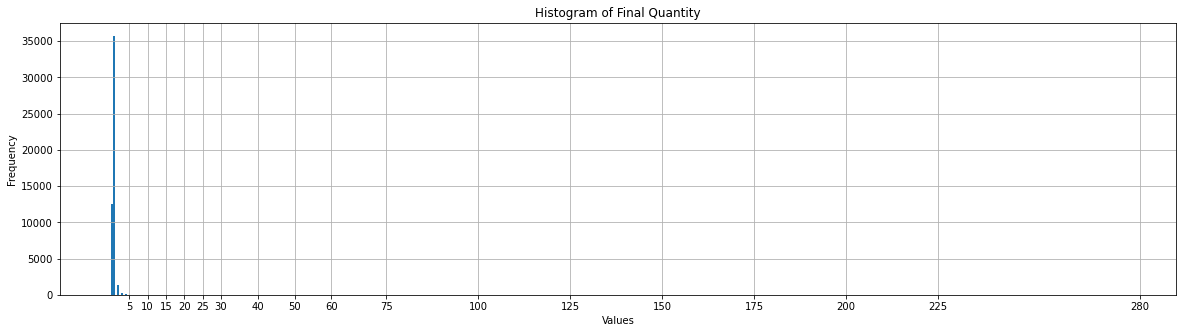

In [11]:
#plotting a histogram to see distribution
plt.figure(figsize=(20, 5))
transactions.final_quantity_float.hist(bins=500)
plt.title('Histogram of Final Quantity')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xticks(ticks=[5,10,15,20,25,30,40,50,60,75,100,125,150,175,200,225,280])
plt.show()

In [12]:
#doing the same for final sale column, except replacing empty strings with NaN
transactions['FINAL_SALE'].replace(' ', np.nan, inplace=True)
transactions['final_sale_float'] = transactions['FINAL_SALE'].astype(float)
transactions['final_sale_float'].describe()

count    37500.000000
mean         4.576384
std          6.625663
min          0.000000
25%          1.790000
50%          3.000000
75%          5.190000
max        462.820000
Name: final_sale_float, dtype: float64

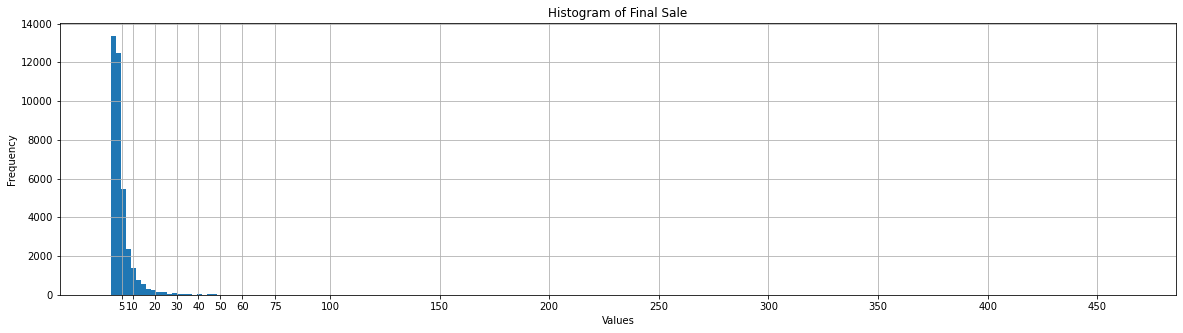

In [13]:
#plotting a histogram to see distribution
plt.figure(figsize=(20, 5))
transactions.final_sale_float.hist(bins=200)
plt.title('Histogram of Final Sale')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xticks(ticks=[5,10,20,30,40,50,60,75,100,150,200,250,300,350,400,450])
plt.show()

In [14]:
transactions.head(5)

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,final_quantity_float,final_sale_float
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539000+00:00,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,NaN,1.0,NaN
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206000+00:00,ALDI,62c08877baa38d1a1f6c211a,NaN,0,1.49,0.0,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813000+00:00,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,NaN,1.0,NaN
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468000+00:00,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,0,3.49,0.0,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549000+00:00,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,NaN,1.0,NaN


In [15]:
transactions.nunique(dropna=False)

RECEIPT_ID              24440
PURCHASE_DATE              89
SCAN_DATE               24440
STORE_NAME                954
USER_ID                 17694
BARCODE                 11028
FINAL_QUANTITY             87
FINAL_SALE               1435
final_quantity_float       87
final_sale_float         1435
dtype: int64

In [16]:
transactions.columns[transactions.isna().any()]

Index(['BARCODE', 'FINAL_SALE', 'final_sale_float'], dtype='object')

In [17]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   RECEIPT_ID            50000 non-null  object             
 1   PURCHASE_DATE         50000 non-null  datetime64[ns]     
 2   SCAN_DATE             50000 non-null  datetime64[ns, UTC]
 3   STORE_NAME            50000 non-null  object             
 4   USER_ID               50000 non-null  object             
 5   BARCODE               44238 non-null  float64            
 6   FINAL_QUANTITY        50000 non-null  object             
 7   FINAL_SALE            37500 non-null  object             
 8   final_quantity_float  50000 non-null  float64            
 9   final_sale_float      37500 non-null  float64            
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(3), object(5)
memory usage: 3.8+ MB


In [18]:
users.head(5)

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [19]:
users.nunique(dropna=False)

ID              100000
CREATED_DATE     99942
BIRTH_DATE       54722
STATE               53
LANGUAGE             3
GENDER              12
dtype: int64

In [20]:
users.columns[users.isna().any()]

Index(['BIRTH_DATE', 'STATE', 'LANGUAGE', 'GENDER'], dtype='object')

In [21]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB


In [23]:
#convert date columns to datetime data type
users['BIRTH_DATE'] = pd.to_datetime(users['BIRTH_DATE'])
users['CREATED_DATE'] = pd.to_datetime(users['CREATED_DATE'])

In [24]:
users.head(5)

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54+00:00,2000-08-11 00:00:00+00:00,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55+00:00,2001-09-24 04:00:00+00:00,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18+00:00,1994-10-28 00:00:00+00:00,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22+00:00,NaT,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50+00:00,1972-03-19 00:00:00+00:00,PA,en,female


## 1) Explore the data

### 1.1.  Are there any data quality issues present?
##### Just looking at the data types, I can see that dates are currently stored as objects instead of datetime.  Final quantity and final sale fields on the transactions table are also stored as objects instead of int or float; (in fact some of the final quantity values are stored as the string 'zero' instead of 0).  Barcode column in the transactions table is also stored as float and should probably be object depending on what we need to do with the field.  Some of the birth dates on the Users table has a specific time, this could be erroneous as well. 

##### Some items are not associated with any brand or manufacturer, which seems strange as almost every product should have a brand.

##### Looking at the distribution of final quantity on the transactions table, one would expect whole numbers for quantities, however there are decimals; which could be a data quality issue.  Additionally, most quantities fall below 5 but the max is 276, which might not necessarily be erroneous but might need further investigation.  The same thing applies to final sale, where most values fall under 10 with a max of 462.82, which again may require validating.

### 1.2. Are there any fields that are challenging to understand?
#####  As mentioned earlier, on the transactions table, final quantity can be 'zero' yet the final sale for those records will be a nonzero price.  Additionally, quantities can be partial. These fields are not readily understandable at first glance.  Scan date is also not a straightforward field to comprehend from just the name.  Sometimes it comes after the purchase date, other times it's the same date.

## 2) SQL queries

### 2.1. What are the top 5 brands by receipts scanned among users 21 and over?

In [26]:
#CTE outputs transactions from users who were 21 and over by the receipt scan date (date diff between birth date and scan date)
#Query joins output back to products table to get brand and a count of receipts
#Using a group by, ordering by most to least receipts and then a limit to see top brands
ps.sqldf("with adult_trans as (select u.id, u.birth_date, t.scan_date, \
                           (julianday(t.scan_date) - julianday(u.birth_date))/365 age, \
                           t.receipt_id, t.barcode \
                           from users u join transactions t on u.id=t.user_id \
                           where (julianday(t.scan_date) - julianday(u.birth_date))/365 >= 21) \
          select brand, count(at.receipt_id) receipt_count\
          from adult_trans at join products p on p.barcode=at.barcode \
          group by 1 \
          order by 2 desc limit 10")

,BRAND,receipt_count
0,NERDS CANDY,6
1,DOVE,6
2,None,6
3,TRIDENT,4
4,SOUR PATCH KIDS,4
5,MEIJER,4
6,HERSHEY'S,4
7,GREAT VALUE,4
8,COCA-COLA,4
9,UTZ,2


##### Since there seems to be ties in the number of receipts and null brand, I decided to look at the top 10 rows

### 2.2. What are the top 5 brands by sales among users that have had their account for at least six months?

In [27]:
#CTE outputs transactions from users whose accounts were atleast 6 months old
#Query joins output back to products table to get brand and a sum of total sales (assuming sales is final quantity*final sale)
#Using a group by, ordering by most to least sales and then a limit of 5 shows us the top 5 brands
ps.sqldf("with sales as (select u.id, u.created_date, t.purchase_date, \
                           (julianday(t.purchase_date) - julianday(u.created_date))/365 account_age, \
                           t.receipt_id, t.barcode, t.final_quantity_float, t.final_sale_float \
                           from users u join transactions t on u.id=t.user_id \
                           where (julianday(t.purchase_date) - julianday(u.created_date))/365 >= 0.5) \
          select p.brand, sum(s.final_sale_float*s.final_quantity_float) total_sales \
          from sales s join products p on p.barcode=s.barcode \
          group by 1 order by 2 desc limit 5")

,BRAND,total_sales
0,CVS,72.00
1,DOVE,30.91
2,TRESEMMÉ,29.16
3,TRIDENT,23.36
4,COORS LIGHT,17.48


### 2.3. Who are Fetch’s power users?

#### To define 'power users', I am making the assumption that the total number of receipts/transactions of each user to be the metric we are going by.  So I am looking for the users with the most receipts.

In [28]:
#first, I take a look at the highest possible number of receipts by user
user_receipts = ps.sqldf("select user_id, count(distinct receipt_id) receipts \
          from transactions \
          group by 1 order by 2 desc")

user_receipts.head(5)

,USER_ID,receipts
0,64e62de5ca929250373e6cf5,10
1,62925c1be942f00613f7365e,10
2,64063c8880552327897186a5,9
3,6327a07aca87b39d76e03864,7
4,624dca0770c07012cd5e6c03,7


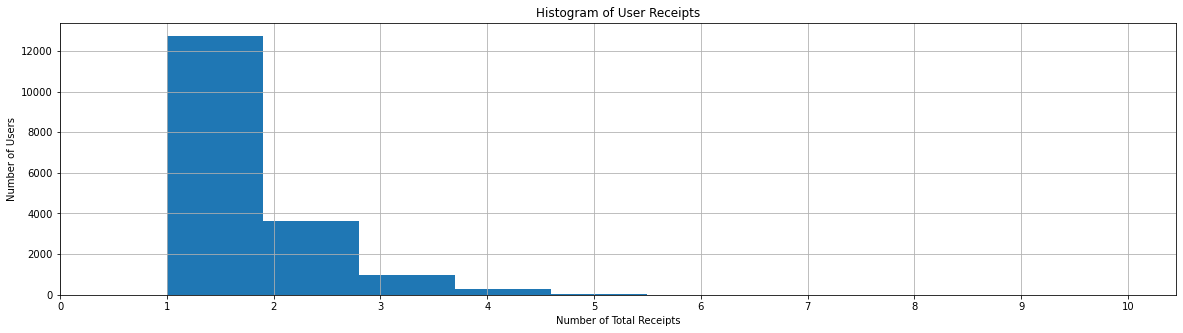

In [29]:
#to define a cut-off for what constitutes as 'more receipts than average' I take a look at the distribution of 
# number of receipts.  It looks like we can say over 3 transactions for a user can be considered a 'power user'
plt.figure(figsize=(20, 5))
user_receipts.receipts.hist()
plt.title('Histogram of User Receipts')
plt.xlabel('Number of Total Receipts')
plt.ylabel('Number of Users')
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10])
plt.show()

In [30]:
#CTE joins users and transactions tables to find users with 3+ receipts
#query joins output back to users table to get other attributes

ps.sqldf("with power_users as (select user_id, count(distinct receipt_id) receipts \
          from transactions \
          group by 1 \
          having receipts >= 3) \
          select u.* from power_users pu join users u on u.id=pu.user_id")

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,610a8541ca1fab5b417b5d33,2021-08-04 12:17:05.000000,1977-01-12 00:00:00.000000,NY,en,male
1,62ffec490d9dbaff18c0a999,2022-08-19 20:02:17.000000,1951-12-24 05:00:00.000000,NY,en,female
2,62c09104baa38d1a1f6c260e,2022-07-02 18:40:04.000000,1978-03-31 00:00:00.000000,PA,en,female
3,61a58ac49c135b462ccddd1c,2021-11-30 02:21:56.000000,1996-05-20 00:00:00.000000,TN,en,female
4,6528a0a388a3a884364d94dc,2023-10-13 01:42:59.000000,1988-06-30 00:00:00.000000,WV,en,female
5,5c366bf06d9819129dfa1118,2019-01-09 21:47:28.000000,1989-04-21 04:00:00.000000,NC,en,female


#### Unfortunately, only 5 of the user IDs exist on the users table.  Either user records were removed from this table after users deactivated their accounts or there is a data quality issue.  We have this list of 5 'power users', so can can stop here or change the threshold for the definition of 'power user' and get some actual user demographics utilizing some of the fields in the users table.  We can already see that the power users right now look to be English-speaking women.

In [31]:
#Changing the threshold of number of receipts for power users to 2 and 
#adding a case statement to the query to break down the ages by groups

poweruser_demos = ps.sqldf("with power_users as (select user_id, count(distinct receipt_id) receipts \
          from transactions \
          group by 1 \
          having receipts >= 2) \
          select u.language, u.gender, \
             CASE when '2025-03-15' - u.birth_date <= 25 then '25 and under' \
                  when '2025-03-15' - u.birth_date > 25 and '2025-03-15' - u.birth_date <= 45 then '25 - 45' \
                  when '2025-03-15' - u.birth_date > 45 and '2025-03-15' - u.birth_date <= 60 then '45 - 60' \
                  else '60+' end as age_group, \
            count(u.id) user_count \
         from power_users pu join users u on u.id=pu.user_id \
         group by 1,2,3 order by 4 desc,3")

poweruser_demos

,LANGUAGE,GENDER,age_group,user_count
0,en,female,25 - 45,11
1,en,female,60+,6
2,en,female,45 - 60,5
3,en,male,25 - 45,2
4,en,male,60+,2
5,es-419,female,25 - 45,1
6,en,male,45 - 60,1


In [32]:
#creating a group by so we can better see the breakdown by gender and age groups visually
demos_agg = poweruser_demos.groupby(['GENDER', 'age_group'])['user_count'].sum().unstack().fillna(0)
demos_agg

age_group,25 - 45,45 - 60,60+
GENDER,,,
female,12,5,6
male,2,1,2


<Figure size 576x432 with 0 Axes>

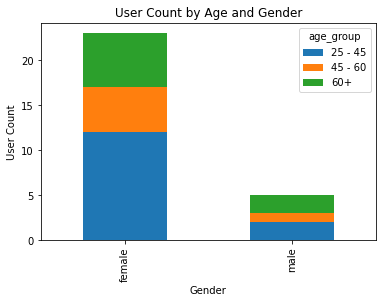

In [33]:
#plotting stacked bar chart
plt.figure(figsize=(8, 6))
demos_agg.plot(stacked=True,kind='bar')
plt.title('User Count by Age and Gender')
plt.xlabel('Gender')
plt.ylabel('User Count')
plt.show()

#### Women are definitely power users, specifically 25-45 year old English-speaking women.

## 3. Communicate with stakeholders

Hi [stakeholder(s)],  
    Just wanted to drop a note to better understand our top brands.  Taking a quick look at our data:
   #### -  In terms of receipts scanned by 21+ users, the top brands were Nerds Candy and Dove with 6 total receipts and Trident, Sour Patch Kids, Meijer, Hershey's, Great Value and Coca-Cola with 4 receipts
   #### - In terms of sales among users with accounts older than 6 months, the top brands were: CVS, Dove, Tresemme, Trident, and Coors Light
   Interestingly, when looking at top-level demographics of our userbase, the power users tend to be English-speaking women aged 25-45.  However, this is in terms of number of receipts/transactions as I am trying to understand some of the data--namely, the 'final sale' and 'final quantity' columns.  I notice some of the final quantities were 'zero' yet there is a final sale price.  Not sure if these are erroneous or if there is some business logic behind these data points.  Additionally, some of the items also have no brand or manufacturer and a large number of users from our transactions data do not exist in our users records.  If anyone can shed some light here or point me in the right direction, would greatly appreciate it.  Once I get more clarification, I can definitely provide more in-depth insights.
   
Thanks,

Lisa